In [2]:
#load appropriate libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import dataset
df = pd.read_csv('weather_aus_sample.csv')

In [4]:
#preview first 5 observations
df.head()

,Date,Location,Min Temp,Max Temp,Rainfall,Evaporation,Sunshine,Wind Gust Dir,Wind Gust Speed,Wind Dir 9am,...,Humidity 9am,Humidity 3pm,Pressure 9am,Pressure 3pm,Cloud 9am,Cloud 3pm,Temp 9am,Temp 3pm,Rain Today,Rain Tomorrow
0,1/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,3/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,4/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,5/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
#check the shape of the DataFrame
df.shape

(145460, 23)

In [6]:
#check columns
df.columns

Index(['Date', 'Location', 'Min Temp', 'Max Temp', 'Rainfall', 'Evaporation',
       'Sunshine', 'Wind Gust Dir', 'Wind Gust Speed', 'Wind Dir 9am',
       'Wind Dir 3pm', 'Wind Speed 9am', 'Wind Speed 3pm', 'Humidity 9am',
       'Humidity 3pm', 'Pressure 9am', 'Pressure 3pm', 'Cloud 9am',
       'Cloud 3pm', 'Temp 9am', 'Temp 3pm', 'Rain Today', 'Rain Tomorrow'],
      dtype='object')

In [7]:
#We need to fix the column by replacing 'spaces' with '_', and enforce lower case of names
def col_clean(column_names):
    new_col = []
    for name in column_names:
        name = name.lower().replace(' ', '_')
        new_col.append(name)
    return new_col


In [8]:
#use function to clean the column names
df.columns = col_clean(df.columns)
df.columns

Index(['date', 'location', 'min_temp', 'max_temp', 'rainfall', 'evaporation',
       'sunshine', 'wind_gust_dir', 'wind_gust_speed', 'wind_dir_9am',
       'wind_dir_3pm', 'wind_speed_9am', 'wind_speed_3pm', 'humidity_9am',
       'humidity_3pm', 'pressure_9am', 'pressure_3pm', 'cloud_9am',
       'cloud_3pm', 'temp_9am', 'temp_3pm', 'rain_today', 'rain_tomorrow'],
      dtype='object')

In [16]:
df.head()

,date,location,min_temp,max_temp,rainfall,evaporation,sunshine,wind_gust_dir,wind_gust_speed,wind_dir_9am,...,wind_speed_9am,wind_speed_3pm,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm
0,1/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,2/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,3/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,4/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,5/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [19]:
#statistics summary
df.describe()

,min_temp,max_temp,rainfall,evaporation,sunshine,wind_gust_speed,wind_speed_9am,wind_speed_3pm,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [10]:
#take a brief look at each columns non-null values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             145460 non-null  object 
 1   location         145460 non-null  object 
 2   min_temp         143975 non-null  float64
 3   max_temp         144199 non-null  float64
 4   rainfall         142199 non-null  float64
 5   evaporation      82670 non-null   float64
 6   sunshine         75625 non-null   float64
 7   wind_gust_dir    135134 non-null  object 
 8   wind_gust_speed  135197 non-null  float64
 9   wind_dir_9am     134894 non-null  object 
 10  wind_dir_3pm     141232 non-null  object 
 11  wind_speed_9am   143693 non-null  float64
 12  wind_speed_3pm   142398 non-null  float64
 13  humidity_9am     142806 non-null  float64
 14  humidity_3pm     140953 non-null  float64
 15  pressure_9am     130395 non-null  float64
 16  pressure_3pm     130432 non-null  floa

We can see that there are 23 columns of data.
Here is a brief description of each column:

**date**: Date of measurement  
**location**: Common name of the location of the weather station  
**minTemp**: The minimum temperature in celcius degrees  
**max_temp**: The maximum temperature in celcius degrees  
**rainfall**: The amount of rainfall recorded for the day in mm  
**evaporation**: Class A pan evaporation (mm) in the 24 hours to 9am  
**sunshine**: Number of hours of bright sunshine during the day  
**wind_gust_dir**: The *direction* of the *strongest* wind gust in the 24 hours to midnight  
**wind_gust_speed**: The *speed* (km/h) of the *strongest* wind gust in the 24 hours to midnight  
**wind_dir_9am**: The direction of the wind at *9am*  
**wind_dir_3pm**: The direction of the wind at *3pm*  
**wind_speed_9am**: Wind speed (km/hr) averaged over 10 minutes prior to 9am  
**wind_speed_3pm**: Wind speed (km/hr) averaged over 10 minutes prior to 3pm  
**humidty_9am**: Humidity (percent) at 9am  
**humidty_3pm**: Humidity (percent) at 3pm  
**pressure_9am**: Atmospheric pressure (hpa) reduced to mean sea level at 9am  
**pressure_3pm**: Atmospheric pressure (hpa) reduced to mean sea level at 3pm  
**cloud_9am**: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.  
**cloud_3pm**: Same as *cloud_9am* but for 3pm  
**temp_9am**: Temperature (degrees C) at 9am  
**temp_3pm**: Temperature (degrees C) at 3pm  
**rain_today**: A boolean value. 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0  
**rain_tomorrow**: 'Yes' answer if it rained more than 1mm the following day based on prediction

In [11]:
#count how many null values there are
df.isna().sum()

date                   0
location               0
min_temp            1485
max_temp            1261
rainfall            3261
evaporation        62790
sunshine           69835
wind_gust_dir      10326
wind_gust_speed    10263
wind_dir_9am       10566
wind_dir_3pm        4228
wind_speed_9am      1767
wind_speed_3pm      3062
humidity_9am        2654
humidity_3pm        4507
pressure_9am       15065
pressure_3pm       15028
cloud_9am          55888
cloud_3pm          59358
temp_9am            1767
temp_3pm            3609
rain_today          3261
rain_tomorrow       3267
dtype: int64

# BUSINESS QUESTION #  

We want to see which location would be the most profitable for selling raincoats and umbrellas.  

The two variables that we are most interested in is *location* and *rainfall*.  

**What location has the most rainfall?**

We will use the locations of the capital cities of Australia.

## Data Cleaning ##

In [36]:
#drop some columns that are not relevant to the question
col_drop = ['rain_today', 'rain_tomorrow']
df.drop(col_drop, axis = 1, inplace = True)
df.head()

KeyError: "['rain_today' 'rain_tomorrow'] not found in axis"

### Convert date format ###

In [30]:
#convert date to datetime format
df['date'] = pd.to_datetime(df['date'])

In [38]:
#check if 'date' is the right datatype
df.dtypes

date               datetime64[ns]
location                   object
min_temp                  float64
max_temp                  float64
rainfall                  float64
evaporation               float64
sunshine                  float64
wind_gust_dir              object
wind_gust_speed           float64
wind_dir_9am               object
wind_dir_3pm               object
wind_speed_9am            float64
wind_speed_3pm            float64
humidity_9am              float64
humidity_3pm              float64
pressure_9am              float64
pressure_3pm              float64
cloud_9am                 float64
cloud_3pm                 float64
temp_9am                  float64
temp_3pm                  float64
dtype: object

In [41]:
#create a new column 'year' by extracting 'year' from 'date'
#this will be used for plotting
#dt = datetime attribute
df['year'] = df['date'].dt.year
df.head()

,date,location,min_temp,max_temp,rainfall,evaporation,sunshine,wind_gust_dir,wind_gust_speed,wind_dir_9am,...,wind_speed_3pm,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm,year
0,2008-01-12,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008
1,2008-02-12,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008
2,2008-03-12,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008
3,2008-04-12,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008
4,2008-05-12,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008


### Subset capital cities of Australia from location

In [42]:
#check how many unique Locations there are
df.location.nunique()

49

In [43]:
#check location names
df.location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [50]:
#subset capital cities of Australia
cap_cities = df[df.location.isin(['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide', 'Hobart', 'Canberra', 'Darwin'])]
cap_cities

,date,location,min_temp,max_temp,rainfall,evaporation,sunshine,wind_gust_dir,wind_gust_speed,wind_dir_9am,...,wind_speed_3pm,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm,year
30176,2008-01-02,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,2008
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,2008
30178,2008-03-02,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,2008
30179,2008-04-02,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,2008
30180,2008-05-02,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,2017
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,2017
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,2017
142302,2017-06-24,Darwin,20.2,31.7,0.0,5.6,10.7,ENE,30.0,ENE,...,7.0,73.0,32.0,1013.9,1009.7,6.0,5.0,25.4,31.0,2017


## Data Plotting

<AxesSubplot:xlabel='year'>

<Figure size 1440x1080 with 0 Axes>

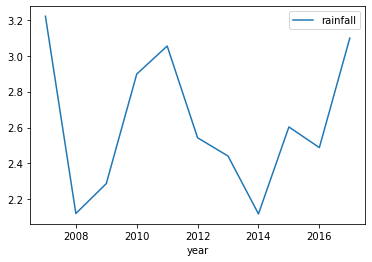

In [47]:
#plot a lineplot to show rainfall through time for all capital cities of Australia
plt.figure(figsize=(20,15))
cap_cities.groupby('year').agg({'rainfall':'mean'}).plot(kind='line')

<AxesSubplot:xlabel='year', ylabel='rainfall'>

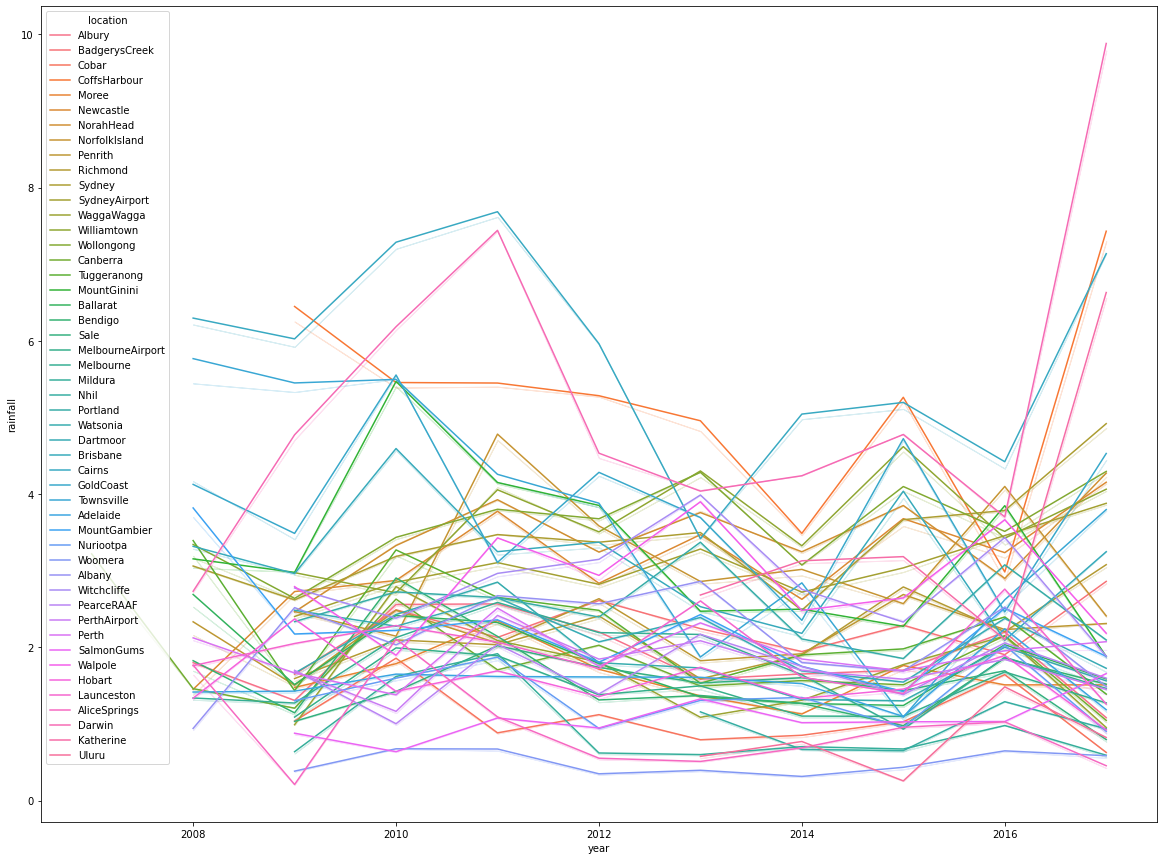

In [49]:
#Show rainfall data for each location in Australia
plt.figure(figsize=(20,15))
sns.lineplot(x='year', y='rainfall', data=df, hue='location', ci=False)

This plot is too cluttered to look for specific cites with high rainfall trends.
We will reduce the locations to the capital cities of Australia.

<AxesSubplot:xlabel='year', ylabel='rainfall'>

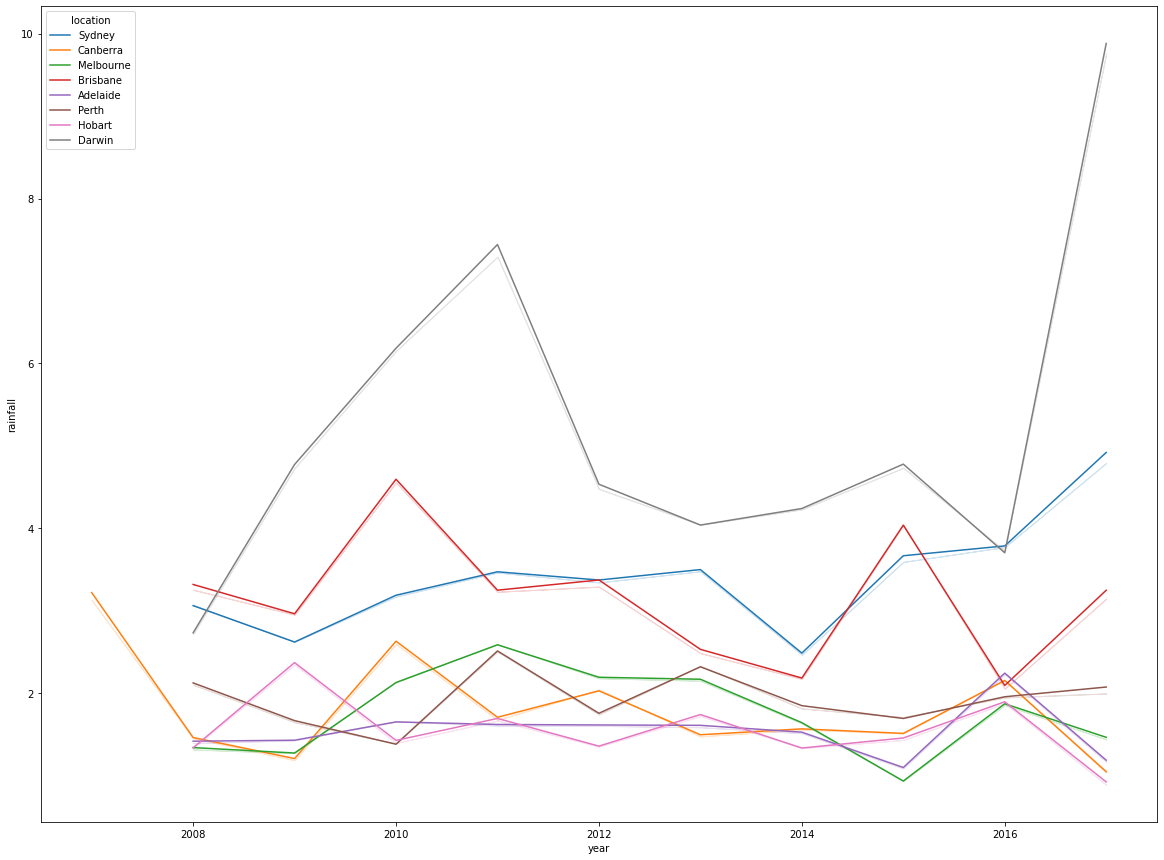

In [51]:
#show rainfall data for each capital city of Australia
plt.figure(figsize=(20,15))
sns.lineplot(x='year', y='rainfall', data=cap_cities, hue='location', ci=False)

We can see that Darwin has had increasing rain in the last couple of years. However, it may not be profitable to sell raincoats and umbrellas in Darwin due to low population density.  

We will focus on 3 of Australia's biggest capital city by population.

### Capital cities of Australia by population

<Figure size 720x720 with 0 Axes>

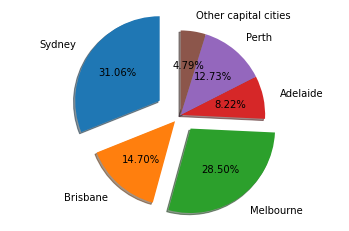

In [54]:
plt.figure(figsize = (10,10))
labels = 'Sydney', 'Brisbane', 'Melbourne', 'Adelaide', 'Perth', 'Other capital cities'
frequency = [4627345, 2189878, 4246375, 1225235, 1896548, 713470]
fig1, ax1 = plt.subplots()
explode = (0.3, 0.1, 0.2, 0, 0, 0)  # only "explode" the 3rd slice (i.e. 'Data Scientist')
ax1.pie(frequency, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90, labeldistance=1.2)
# startangle: by default, the first dataset is shown at 0 degrees = x-axis which then moves counter-clockwise
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

We see the biggest three capital cities are Sydney, Melbourne, and Brisbane, so we will focus our new line plot on those cities.

In [56]:
big_cities = cap_cities[cap_cities['location'].isin(['Sydney', 'Melbourne', 'Brisbane'])]
big_cities

,date,location,min_temp,max_temp,rainfall,evaporation,sunshine,wind_gust_dir,wind_gust_speed,wind_dir_9am,...,wind_speed_3pm,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm,year
30176,2008-01-02,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,2008
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,2008
30178,2008-03-02,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,2008
30179,2008-04-02,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,2008
30180,2008-05-02,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87195,2017-06-21,Brisbane,12.2,23.4,0.0,4.0,9.2,WSW,20.0,SW,...,6.0,61.0,44.0,1023.4,1021.3,1.0,4.0,17.2,23.3,2017
87196,2017-06-22,Brisbane,13.7,22.7,0.0,3.4,7.2,SE,20.0,SW,...,4.0,62.0,55.0,1026.0,1022.4,2.0,3.0,17.8,20.5,2017
87197,2017-06-23,Brisbane,10.3,23.7,0.0,3.2,9.4,W,24.0,SW,...,9.0,71.0,37.0,1023.3,1018.4,1.0,3.0,15.2,23.1,2017
87198,2017-06-24,Brisbane,10.4,24.5,0.0,3.4,8.9,S,17.0,S,...,2.0,75.0,33.0,1018.6,1015.4,7.0,5.0,14.3,24.0,2017


<AxesSubplot:xlabel='year', ylabel='rainfall'>

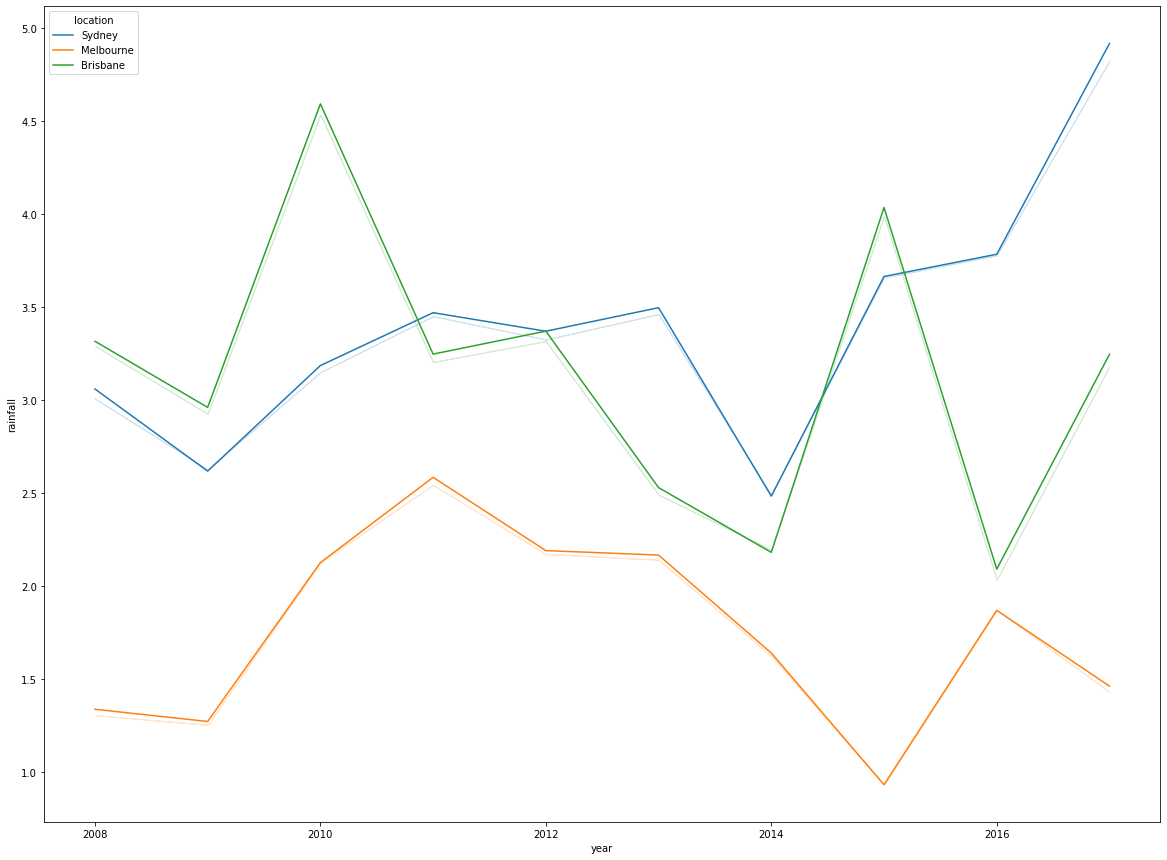

In [58]:
#plot new line graph with the 3 big cities
plt.figure(figsize=(20,15))
sns.lineplot(x='year', y='rainfall', data=big_cities, hue='location', ci=False)

We can see that for the last 10 years, there is some cyclical pattern of high rainfall years, and low rainfall years.  
Both Brisbane and Sydney rainfall data shows they are on the increase and this would be a good place to sell our items based on increasing rain and population density.

Melbourne should be avoided as the data suggest that rainfall will keep 

## The most profitable location to sell umbrellas and raincoats is in Sydney and Brisbane.